<<RandomForestClassifier>>
'test' accuracy: 0.9687428571428571
RandomForestClassifier timer: 30 seconds and 156.81 milliseconds 

<<ExtraTreesClassifier>>
'test' accuracy: 0.9727428571428571
ExtraTreesClassifier timer: 31 seconds and 504.4 milliseconds 

pred actual
3.0    9.0
7.0    3.0
4.0    9.0
2.0    3.0
3.0    9.0

actual 9.0
pred 3.0


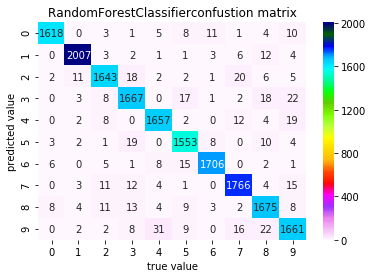

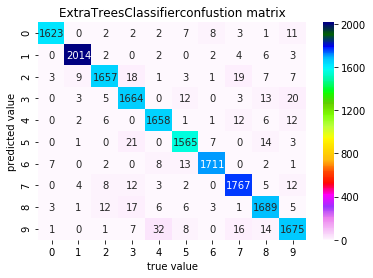

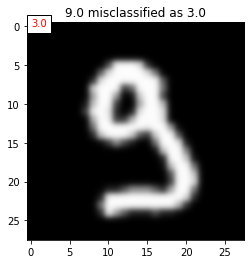

In [2]:
# install humanfriendly if necessary
!pip install humanfriendly

import numpy as np, humanfriendly as hf
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,\
     ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def get_time(time):
    return hf.format_timespan(time, detailed=True)

def find_misses(test, pred):
    return [i for i, row in enumerate(test) if row != pred[i]]

if __name__ == "__main__":
    br = '\n'
    X_file = 'data/X_mnist'
    y_file = 'data/y_mnist'
    X = np.load('data/X_mnist.npy')
    y = np.load('data/y_mnist.npy')
    X = X.astype(np.float32)
    X_train, X_test, y_train, y_test = train_test_split\
                                       (X, y, random_state=0)
    rf = RandomForestClassifier(random_state=0,
                                n_estimators=100)
    rf_name = rf.__class__.__name__
    print ('<<' + rf_name + '>>')
    start = time.perf_counter()
    rf.fit(X_train, y_train)
    end = time.perf_counter()
    elapsed_ls = end - start
    timer = get_time(elapsed_ls)
    rf_name = rf.__class__.__name__
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ('\'test\' accuracy:', accuracy)
    print (rf_name + ' timer:', timer, br)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(1)
    ax = plt.axes()
    sns.heatmap(cm.T, annot=True, fmt="d",
                cmap='gist_ncar_r', ax=ax)
    ax.set_title(rf_name + 'confustion matrix')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    et = ExtraTreesClassifier(random_state=0, n_estimators=100)
    et_name = et.__class__.__name__
    print ('<<' + et_name + '>>')
    start = time.perf_counter()
    et.fit(X_train, y_train)
    end = time.perf_counter()
    elapsed_ls = end - start
    timer = get_time(elapsed_ls)
    y_pred = et.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ('\'test\' accuracy:', accuracy)
    print (et_name + ' timer:', timer, br)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(2)
    ax = plt.axes()
    sns.heatmap(cm.T, annot=True, fmt="d",
                cmap='gist_ncar_r', ax=ax)
    ax.set_title(et_name + 'confustion matrix')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    indx = find_misses(y_test, y_pred)
    print ('pred', 'actual')
    misses = [(y_pred[row], y_test[row], i)
              for i, row in enumerate(indx)]
    [print (row[0], '  ', row[1]) for i, row in enumerate(misses)
     if i < 5]
    print()
    img_act = y_test[indx[0]]
    img_pred = y_pred[indx[0]]
    print ('actual', img_act)
    print ('pred', img_pred)
    text = str(img_pred)
    test_images = X_test.reshape(-1, 28, 28)
    plt.figure(3)
    plt.imshow(test_images[indx[0]], cmap='gray',
               interpolation='gaussian')
    plt.text(0, 0.05, text, color='r',
             bbox=dict(facecolor='white'))
    title = str(img_act) + ' misclassified as ' + text
    plt.title(title)
    plt.show()